*Python Machine Learning 3rd Edition* by [Sebastian Raschka](https://sebastianraschka.com) & [Vahid Mirjalili](http://vahidmirjalili.com), Packt Publishing Ltd. 2019

Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/LICENSE.txt)

# Chapter 13: Parallelizing Neural Network Training with TensorFlow (Part 1/2)


Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [2]:
from IPython.display import Image
%matplotlib inline

## TensorFlow and training performance

### Performance challenges

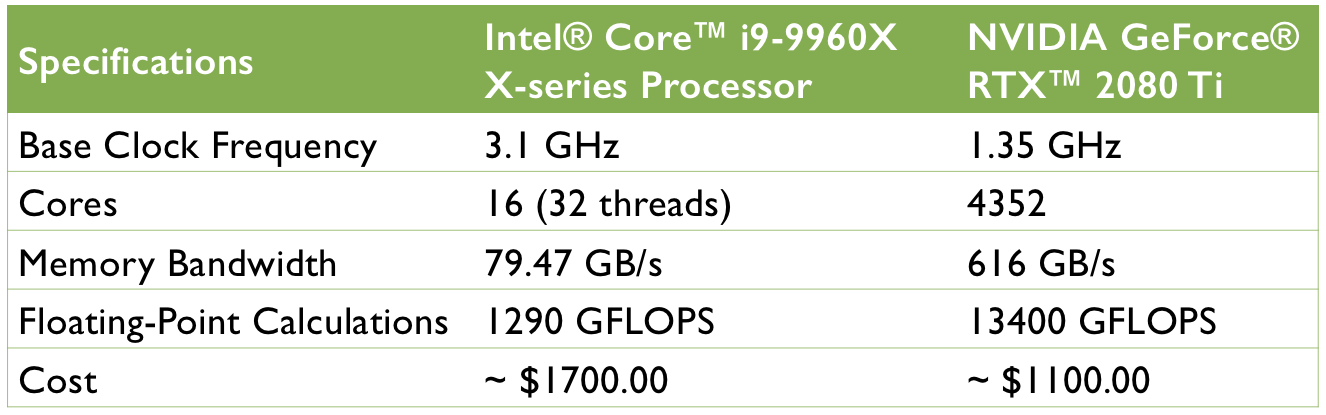

In [3]:
Image(filename='images/01.png', width=800)

### What is TensorFlow?

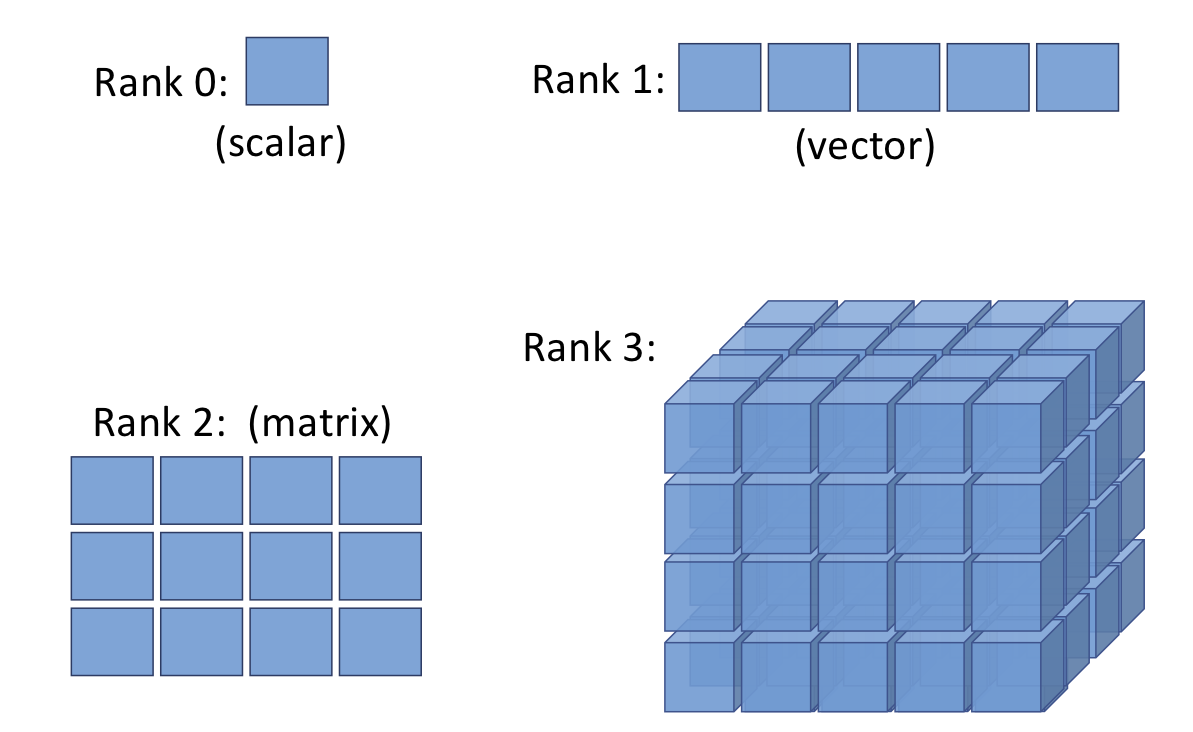

In [4]:
Image(filename='images/02.png', width=500)

### How we will learn TensorFlow

## First steps with TensorFlow

### Installing TensorFlow

In [5]:
#! pip install tensorflow

In [1]:
import tensorflow as tf
print('TensorFlow version:', tf.__version__)
import numpy as np

np.set_printoptions(precision=3)

TensorFlow version: 2.3.0


In [2]:
! python -c 'import tensorflow as tf; print(tf.__version__)'

2.3.0


### Creating tensors in TensorFlow

In [4]:
a = np.array([1, 2, 3,5,6,7,4,3,3,6], dtype=np.int32)
b = [4,6,4,2,5,6,2,6,2,7]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3 5 6 7 4 3 3 6], shape=(10,), dtype=int32)
tf.Tensor([4 6 4 2 5 6 2 6 2 7], shape=(10,), dtype=int32)


In [5]:
tf.is_tensor(a), tf.is_tensor(t_a)

(False, True)

In [6]:
t_ones = tf.ones((3, 3))

t_ones.shape

TensorShape([3, 3])

In [10]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [12]:
const_tensor = tf.constant([3.2,5, 5, np.pi, np.sqrt(45)], dtype=tf.float32)

print(const_tensor)

tf.Tensor([3.2   5.    5.    3.142 6.708], shape=(5,), dtype=float32)


### Manipulating the data type and shape of a tensor

In [14]:
t_a_new = tf.cast(t_a, tf.int64)

print(t_a_new.dtype)
t_a_new.numpy()

<dtype: 'int64'>


array([1, 2, 3, 5, 6, 7, 4, 3, 3, 6])

In [17]:
t = tf.random.uniform(shape=(8, 63))

t_tr = tf.transpose(t)
print(t.shape, ' --> ', t_tr.shape)

#t.numpy()

(8, 63)  -->  (63, 8)


In [19]:
t = tf.zeros((30,1))

t_reshape = tf.reshape(t, shape=(5, 6))

print(t_reshape.shape)
t_reshape.numpy()

(5, 6)


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [60]:
t = tf.ones((2, 3, 1,4,1))
print(t.numpy())
t_sqz = tf.squeeze(t, axis=(2,4))

print(t.shape, ' --> ', t_sqz.shape)
t_sqz.numpy()

[[[[[1.]
    [1.]
    [1.]
    [1.]]]


  [[[1.]
    [1.]
    [1.]
    [1.]]]


  [[[1.]
    [1.]
    [1.]
    [1.]]]]



 [[[[1.]
    [1.]
    [1.]
    [1.]]]


  [[[1.]
    [1.]
    [1.]
    [1.]]]


  [[[1.]
    [1.]
    [1.]
    [1.]]]]]
(2, 3, 1, 4, 1)  -->  (2, 3, 4)


array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)

### Applying mathematical operations to tensors

In [61]:
tf.random.set_seed(1)

t1 = tf.random.uniform(shape=(5, 5), 
                       minval=-1.0,
                       maxval=1.0)

t2 = tf.random.normal(shape=(5, 5), 
                      mean=0.0,
                      stddev=1.0)


In [64]:
t3 = t1*t2
print(t3)

tf.Tensor(
[[-0.27  -0.874 -0.017 -0.175 -0.296]
 [-0.139 -0.727  0.135 -0.401  0.004]
 [-0.151 -0.399 -0.261 -0.266  0.065]
 [-1.172  0.081 -0.333 -0.325 -0.807]
 [-0.391 -1.242  0.409 -0.784 -0.424]], shape=(5, 5), dtype=float32)


In [62]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874 -0.017 -0.175 -0.296]
 [-0.139 -0.727  0.135 -0.401  0.004]
 [-0.151 -0.399 -0.261 -0.266  0.065]
 [-1.172  0.081 -0.333 -0.325 -0.807]
 [-0.391 -1.242  0.409 -0.784 -0.424]]


In [71]:
t4 = tf.math.reduce_mean(t1, axis=0)

print(t4)

print(np.mean(t4,0))

tf.Tensor([-0.097  0.197 -0.088  0.167  0.027], shape=(5,), dtype=float32)
0.041053884


In [72]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)

print(t5.numpy())

[[-1.631 -0.403 -1.402 -0.712  0.84 ]
 [-0.335 -1.128 -1.895 -0.739  2.044]
 [ 0.199 -1.435 -1.013  0.532  0.343]
 [ 1.361  0.117  0.871 -2.556  2.955]
 [ 0.378  1.751  1.404  1.414 -2.431]]


In [75]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)

print(t6.numpy())

[[-2.123  1.493 -1.258  0.038  1.281]
 [ 0.184 -3.161 -0.774 -2.11   0.196]
 [-0.289 -2.414 -0.067 -1.847  0.754]
 [ 0.865 -1.616  0.294 -1.952 -0.959]
 [ 0.99  -1.05   0.547 -2.23  -1.457]]


In [79]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()

print(norm_t1)

[1.163 1.072 0.896 1.534 1.495]


In [23]:
np.sqrt(np.sum(np.square(t1), axis=1))

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

### Split, stack, and concatenate tensors

Best help:

https://www.tensorflow.org/versions/r2.0/api_docs/python/tf

In [3]:
tf.random.set_seed(1)

t = tf.random.uniform((10,))

print(t.numpy())

t_splits = tf.split(t, 2) ## must be divisible

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292 0.643 0.976 0.435 0.66  0.605]


[array([0.165, 0.901, 0.631, 0.435, 0.292], dtype=float32),
 array([0.643, 0.976, 0.435, 0.66 , 0.605], dtype=float32)]

In [8]:

t = tf.random.uniform((10,))

print(t.numpy())

t_splits = tf.split(t, num_or_size_splits=[7, 3])

[item.numpy() for item in t_splits]

[0.976 0.556 0.077 0.163 0.145 0.131 0.891 0.033 0.476 0.869]


[array([0.976, 0.556, 0.077, 0.163, 0.145, 0.131, 0.891], dtype=float32),
 array([0.033, 0.476, 0.869], dtype=float32)]

In [19]:
A = tf.ones((6,))
B = tf.zeros((4,))

C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]


In [27]:
A = tf.ones((5,))
B = tf.zeros((5,))

S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## Building input pipelines using tf.data: The TensorFlow Dataset API

### Creating a TensorFlow Dataset from existing tensors 

In [32]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0, 4.5, 5.3, 20.4, 10.4]

ds = tf.data.Dataset.from_tensor_slices(a)

print(ds)

<TensorSliceDataset shapes: (), types: tf.float32>


In [29]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(4.5, shape=(), dtype=float32)
tf.Tensor(5.3, shape=(), dtype=float32)
tf.Tensor(20.4, shape=(), dtype=float32)
tf.Tensor(10.4, shape=(), dtype=float32)


In [38]:
ds_batch = ds.batch(5)

for i, elem in enumerate(ds_batch, 1):
    print('Batch {}:'.format(i), elem.numpy())

Batch 1: [1.2 3.4 7.5 4.1 5. ]
Batch 2: [ 1.   4.5  5.3 20.4 10.4]


### Combining two tensors into a joint dataset

In [39]:
tf.random.set_seed(1)

t_x = tf.random.uniform([5, 3], dtype=tf.float32)
t_y = tf.range(5)

In [47]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)
    
ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3
  x:  [0.889 0.628 0.532]   y:  4


In [50]:
## method 2:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3
  x:  [0.889 0.628 0.532]   y:  4


In [52]:
ds_trans = ds_joint.map(lambda x, y: (x*3 - 0.5, y))

for example in ds_trans:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [-0.005  2.204  1.393]   y:  0
  x:  [0.804 0.376 1.428]   y:  1
  x:  [2.427 0.805 1.48 ]   y:  2
  x:  [1.315 1.41  1.343]   y:  3
  x:  [2.168 1.383 1.096]   y:  4


### Shuffle, batch, and repeat

In [53]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))

for example in ds:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.889 0.628 0.532]   y:  4
  x:  [0.605 0.637 0.614]   y:  3


In [55]:
ds = ds_joint.batch(batch_size=3, drop_remainder=False)

batch_x, batch_y = next(iter(ds)) # returns next item from the iteration

print('Batch-x: \n', batch_x.numpy())

print('Batch-y:   ', batch_y.numpy())

Batch-x: 
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]
Batch-y:    [0 1 2]


In [57]:
ds = ds_joint.batch(3).repeat(count=2)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.numpy(), batch_y.numpy())


0 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]] [0 1 2]
1 [[0.605 0.637 0.614]
 [0.889 0.628 0.532]] [3 4]
2 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]] [0 1 2]
3 [[0.605 0.637 0.614]
 [0.889 0.628 0.532]] [3 4]


In [58]:
ds = ds_joint.repeat(count=2).batch(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.numpy(), batch_y.numpy())

0 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]] [0 1 2]
1 [[0.605 0.637 0.614]
 [0.889 0.628 0.532]
 [0.165 0.901 0.631]] [3 4 0]
2 [[0.435 0.292 0.643]
 [0.976 0.435 0.66 ]
 [0.605 0.637 0.614]] [1 2 3]
3 [[0.889 0.628 0.532]] [4]


In [64]:
tf.random.set_seed(1)

## Order 1: shuffle -> batch -> repeat
ds = ds_joint.shuffle(3).batch(3).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.numpy(), batch_y.numpy())

0 [[0.435 0.292 0.643]
 [0.165 0.901 0.631]
 [0.976 0.435 0.66 ]] [1 0 2]
1 [[0.889 0.628 0.532]
 [0.605 0.637 0.614]] [4 3]
2 [[0.976 0.435 0.66 ]
 [0.605 0.637 0.614]
 [0.435 0.292 0.643]] [2 3 1]
3 [[0.165 0.901 0.631]
 [0.889 0.628 0.532]] [0 4]
4 [[0.435 0.292 0.643]
 [0.605 0.637 0.614]
 [0.976 0.435 0.66 ]] [1 3 2]
5 [[0.165 0.901 0.631]
 [0.889 0.628 0.532]] [0 4]


In [67]:
tf.random.set_seed(1)

## Order 1: shuffle -> batch -> repeat
ds = ds_joint.shuffle(4).batch(3,drop_remainder=True).repeat(10)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

# Always shuffle first

0 (3, 3) [2 0 1]
1 (3, 3) [0 4 3]
2 (3, 3) [3 2 1]
3 (3, 3) [1 0 3]
4 (3, 3) [1 2 0]
5 (3, 3) [3 2 4]
6 (3, 3) [3 0 2]
7 (3, 3) [3 0 1]
8 (3, 3) [2 0 1]
9 (3, 3) [1 3 0]


In [68]:
tf.random.set_seed(1)

## Order 2: batch -> shuffle -> repeat
ds = ds_joint.batch(3).shuffle(4).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (2, 3) [3 4]
2 (3, 3) [0 1 2]
3 (2, 3) [3 4]
4 (2, 3) [3 4]
5 (3, 3) [0 1 2]


In [71]:
tf.random.set_seed(1)

## Order 2: batch -> shuffle -> repeat
ds = ds_joint.batch(3).shuffle(4).repeat(10)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (2, 3) [3 4]
2 (3, 3) [0 1 2]
3 (2, 3) [3 4]
4 (2, 3) [3 4]
5 (3, 3) [0 1 2]
6 (2, 3) [3 4]
7 (3, 3) [0 1 2]
8 (2, 3) [3 4]
9 (3, 3) [0 1 2]
10 (2, 3) [3 4]
11 (3, 3) [0 1 2]
12 (2, 3) [3 4]
13 (3, 3) [0 1 2]
14 (2, 3) [3 4]
15 (3, 3) [0 1 2]
16 (3, 3) [0 1 2]
17 (2, 3) [3 4]
18 (2, 3) [3 4]
19 (3, 3) [0 1 2]


### Creating a dataset from files on your local storage disk

In [2]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


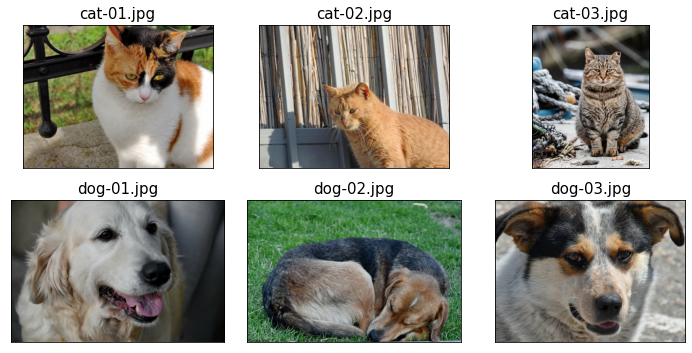

In [3]:
import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
plt.tight_layout()
plt.show()

In [5]:
labels = [0 if 'dog' in os.path.basename(file) else 1
          for file in file_list]
print(labels)

[1, 1, 1, 0, 0, 0]


In [6]:
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'cat_dog_images/cat-01.jpg' 1
b'cat_dog_images/cat-02.jpg' 1
b'cat_dog_images/cat-03.jpg' 1
b'cat_dog_images/dog-01.jpg' 0
b'cat_dog_images/dog-02.jpg' 0
b'cat_dog_images/dog-03.jpg' 0


(80, 120, 3) 1
(80, 120, 3) 1
(80, 120, 3) 1
(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 0


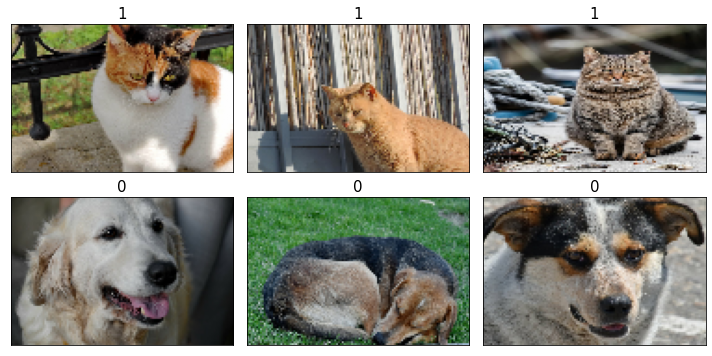

In [7]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0

    return image, label

img_width, img_height = 120, 80

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i,example in enumerate(ds_images_labels):
    print(example[0].shape, example[1].numpy())
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), 
                 size=15)
    
plt.tight_layout()

plt.show()

### Fetching available datasets from the tensorflow_datasets library

In [48]:
! pip install tensorflow-datasets

In [8]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

246
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [15]:
## Run this to see the full list:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'dart',
 'davis',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k

### Fetching CelebA dataset

In [23]:
celeba_bldr = tfds.builder('celeb_a')

print(celeba_bldr.info.features)
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features.keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['image'])
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['attributes'].keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.citation)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

In [24]:
# Download the data, prepare it, and write it to disk
celeba_bldr.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 4/4 [00:02<00:00,  1.64 url/s]
Dl Size...: 0 MiB [00:02, ? MiB/s]
Dl Completed...: 100%|██████████| 4/4 [00:02<00:00,  1.94 url/s]


NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to /home/dani/tensorflow_datasets/downloads/ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.f5a3cdedb92f417d95a4a7227e4876b9/uc, has wrong checksum. Expected: UrlInfo(size=1.34 GiB, checksum='46fb89443c578308acf364d7d379fe1b9efb793042c0af734b6112e4fd3a8c74', filename='img_align_celeba.zip'). Got: UrlInfo(size=3.01 KiB, checksum='92a0103c37fca19f2f03eea78443fc3d305dd81648ddd585f56a609186cc11b3', filename='uc').To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

In [14]:
# Load data from disk as tf.data.Datasets
datasets = celeba_bldr.as_dataset(shuffle_files=False)

datasets.keys()

AssertionError: Dataset celeb_a: could not find data in /home/dani/tensorflow_datasets. Please make sure to call dataset_builder.download_and_prepare(), or pass download=True to tfds.load() before trying to access the tf.data.Dataset object.

In [54]:
#import tensorflow as tf
ds_train = datasets['train']
assert isinstance(ds_train, tf.data.Dataset)

example = next(iter(ds_train))
print(type(example))
print(example.keys())

<class 'dict'>
dict_keys(['attributes', 'image', 'landmarks'])


In [55]:
ds_train = ds_train.map(lambda item: 
     (item['image'], tf.cast(item['attributes']['Male'], tf.int32)))

In [56]:
ds_train = ds_train.batch(18)
images, labels = next(iter(ds_train))

print(images.shape, labels)

(18, 218, 178, 3) tf.Tensor([1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0], shape=(18,), dtype=int32)


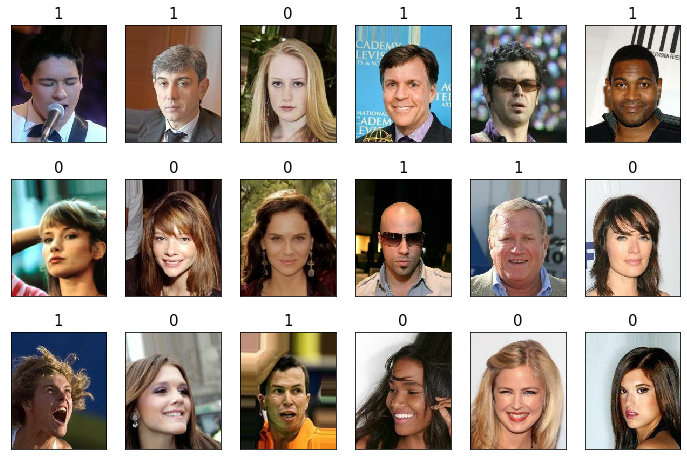

In [57]:
fig = plt.figure(figsize=(12, 8))
for i,(image,label) in enumerate(zip(images, labels)):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title('{}'.format(label), size=15)
    

plt.show()

Alternative ways for loading a dataset

In [58]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)

print(mnist_info)

print(mnist.keys())

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

dict_keys(['test', 'train'])


(10, 28, 28, 1) tf.Tensor([3 4 7 1 9 0 8 8 9 7], shape=(10,), dtype=int64)


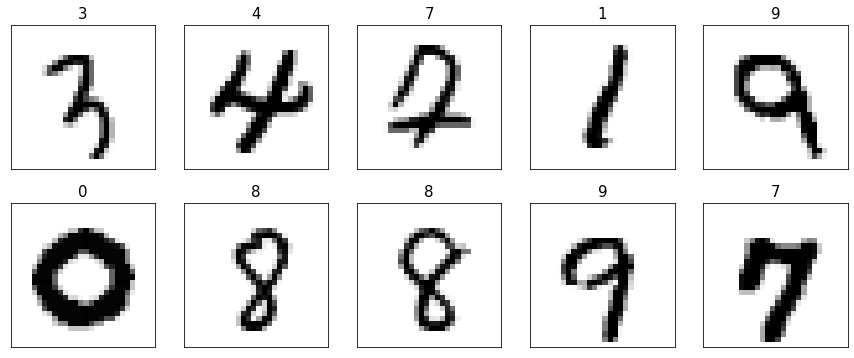

In [59]:
ds_train = mnist['train']

assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item: 
     (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)
    
plt.show()

<br>
<br>
<br>

---

Readers may ignore the next cell.

In [60]:
! python ../.convert_notebook_to_script.py --input ch13_part1.ipynb --output ch13_part1.py

[NbConvertApp] Converting notebook ch13_part1.ipynb to script
[NbConvertApp] Writing 10679 bytes to ch13_part1.py
